In [1]:
!pip install torch torchvision scikit-learn -q
!git clone -q https://github.com/somepago/saint.git
import sys
sys.path.append('saint')  # Include the SAINT repository in the Python path

!ls saint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.7 MB/s eta 0:00:00
augmentations.py  models	pretraining.py	       train.py
data_openml.py	  old_version	README.md	       train_robust.py
LICENSE		  pipeline.png	saint_environment.yml  utils.py


In [3]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive/')



Mounted at /content/drive/


##Load and Preprocess Data

In [4]:
synthtic_data_path = '/content/drive/My Drive/Life expectancy - Final Project/Data/syntatic_data.csv'
df = pd.read_csv(synthtic_data_path)

In [5]:
df.head()

,Sex,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,BMI,AlcoholDrinkers,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,LifeExpectancy
0,1,0,6.0,0,0,0,0,0,0,0,...,0,0,0,26.57,0,0,0,0,0,80.368494
1,1,1,9.0,0,0,0,0,0,0,0,...,0,0,0,21.77,1,0,1,0,0,79.417643
2,0,0,7.0,1,0,1,0,0,0,0,...,0,0,0,26.08,0,0,1,0,0,70.100000
3,1,1,7.0,0,0,0,0,0,0,0,...,0,1,0,22.96,1,0,0,0,0,81.962389
4,1,0,8.0,0,0,0,0,0,0,0,...,0,0,0,27.81,0,1,1,1,0,83.240551


In [6]:
print(df.columns)

Index(['Sex', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'BMI', 'AlcoholDrinkers', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear',
       'LifeExpectancy'],
      dtype='object')


In [7]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Handle missing values if any (fill numeric with mean, categorical with 'Unknown')
for col in df.columns:
    if df[col].dtype == object:  # categorical column
        df[col].fillna('Unknown', inplace=True)
    else:  # numeric column
        df[col].fillna(df[col].mean(), inplace=True)

# Separate features and target
X = df.drop('LifeExpectancy', axis=1)
y = df['LifeExpectancy']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale continuous features using training set mean and std
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Compute train means and stds
train_means = X_train[numeric_cols].mean()
train_stds = X_train[numeric_cols].std().replace(0, 1)  # replace 0 std with 1 to avoid division by zero
# Apply scaling
X_train[numeric_cols] = (X_train[numeric_cols] - train_means) / train_stds
X_test[numeric_cols] = (X_test[numeric_cols] - train_means) / train_stds

# Preview the processed training data
print("Training features sample:")
print(X_train.head())
print("\nTraining target sample:")
print(y_train.head())

<ipython-input-7-ff9678cfa12b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Training features sample:
             Sex  PhysicalActivities  SleepHours  HadHeartAttack  HadAngina  \
54908  -1.028890            0.543464    -0.71132        -0.24406  -0.259128   
89104   0.971916            0.543464     0.66794        -0.24406  -0.259128   
59323   0.971916            0.543464     0.66794        -0.24406  -0.259128   
152236  0.971916            0.543464     0.66794        -0.24406  -0.259128   
115581  0.971916            0.543464    -0.02169        -0.24406  -0.259128   

        HadStroke  HadAsthma   HadCOPD  HadDepressiveDisorder  \
54908   -0.211493  -0.415297 -0.292893              -0.506084   
89104   -0.211493  -0.415297  3.414199              -0.506084   
59323   -0.211493   2.407905 -0.292893              -0.506084   
152236  -0.211493  -0.415297 -0.292893              -0.506084   
115581  -0.211493   2.407905 -0.292893               1.975948   

        HadKidneyDisease  ...  DifficultyDressingBathing  DifficultyErrands  \
54908          -0.221031  ...

##Train the SAINT Model


In [8]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from models import SAINT  # SAINT model class from the cloned repository
from augmentations import embed_data_mask  # function to prepare data for SAINT

# Since 'Country' is removed, there are no categorical features.
# We still add a CLS token as required by SAINT.
cat_cols = []  # No categorical columns remain
cat_dims = []  # No categorical dimensions
cat_dims_with_cls = [1]  # Only the CLS token

# Create numpy arrays for training data
# For categorical data, create an array of shape (n_samples, 1) filled with 0 (CLS token)
x_categ_train = np.zeros((len(X_train), len(cat_dims_with_cls)), dtype=np.int64)
# Continuous features array
x_cont_train = X_train[numeric_cols].values.astype(np.float32)
# Target array
y_train_array = y_train.values.astype(np.float32)

# Do the same for test data
x_categ_test = np.zeros((len(X_test), len(cat_dims_with_cls)), dtype=np.int64)
x_cont_test = X_test[numeric_cols].values.astype(np.float32)
y_test_array = y_test.values.astype(np.float32)

# Convert numpy arrays to torch tensors
X_categ_train_t = torch.tensor(x_categ_train, dtype=torch.int64)
X_cont_train_t  = torch.tensor(x_cont_train, dtype=torch.float32)
y_train_t       = torch.tensor(y_train_array, dtype=torch.float32).unsqueeze(1)  # shape (n,1) for MSELoss
X_categ_test_t  = torch.tensor(x_categ_test, dtype=torch.int64)
X_cont_test_t   = torch.tensor(x_cont_test, dtype=torch.float32)
y_test_t        = torch.tensor(y_test_array, dtype=torch.float32).unsqueeze(1)

# Create masks (1 for present data, 0 for missing)
cat_mask_train = torch.ones_like(X_categ_train_t, dtype=torch.int64)
cat_mask_train[:, 0] = 0  # CLS token is not an actual data feature
cont_mask_train = torch.ones_like(X_cont_train_t, dtype=torch.int64)
cat_mask_test = torch.ones_like(X_categ_test_t, dtype=torch.int64)
cat_mask_test[:, 0] = 0
cont_mask_test = torch.ones_like(X_cont_test_t, dtype=torch.int64)

# Build TensorDataset and DataLoader for training and test evaluation
train_dataset = TensorDataset(X_categ_train_t, X_cont_train_t, y_train_t, cat_mask_train, cont_mask_train)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataset = TensorDataset(X_categ_test_t, X_cont_test_t, y_test_t, cat_mask_test, cont_mask_test)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# Initialize SAINT model with default architecture for regression
model = SAINT(
    categories=tuple(cat_dims_with_cls),   # Tuple of category cardinalities (only CLS token here)
    num_continuous=len(numeric_cols),        # Number of continuous features
    dim=32,                                  # Embedding dimension (default)
    depth=6,                                 # Transformer depth (number of layers)
    heads=8,                                 # Number of attention heads
    attentiontype='colrow',                  # Both column and row attention (full SAINT)
    attn_dropout=0.1, ff_dropout=0.1,         # Dropout rates (default 0.1 from paper)
    y_dim=1                                  # Output dimension (1 for regression)
)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

# Training loop
epochs = 20
for epoch in range(1, epochs + 1):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        x_categ, x_cont, y_true, cat_mask, con_mask = batch
        # Move data to device (GPU/CPU)
        x_categ, x_cont = x_categ.to(device), x_cont.to(device)
        y_true = y_true.to(device)
        cat_mask, con_mask = cat_mask.to(device), con_mask.to(device)

        # Forward pass through model
        optimizer.zero_grad()
        _, x_categ_enc, x_cont_enc = embed_data_mask(x_categ, x_cont, cat_mask, con_mask, model)
        # Transformer forward pass: output representations for all tokens
        reps = model.transformer(x_categ_enc, x_cont_enc)
        y_reps = reps[:, 0, :]  # Extract representation for CLS token (index 0)
        y_pred = model.mlpfory(y_reps)  # Final MLP to get prediction from CLS representation

        # Compute loss and backpropagate
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch:2d}/{epochs}: Training MSE = {avg_loss:.4f}")



Epoch  1/20: Training MSE = 124.7016
Epoch  2/20: Training MSE = 98.6859
Epoch  3/20: Training MSE = 97.7651
Epoch  4/20: Training MSE = 97.2063
Epoch  5/20: Training MSE = 96.8366
Epoch  6/20: Training MSE = 96.0021
Epoch  7/20: Training MSE = 95.4948
Epoch  8/20: Training MSE = 95.5353
Epoch  9/20: Training MSE = 95.0756
Epoch 10/20: Training MSE = 94.8996
Epoch 11/20: Training MSE = 94.9504
Epoch 12/20: Training MSE = 94.2766
Epoch 13/20: Training MSE = 94.3314
Epoch 14/20: Training MSE = 93.9231
Epoch 15/20: Training MSE = 93.6646
Epoch 16/20: Training MSE = 93.6596
Epoch 17/20: Training MSE = 93.5856
Epoch 18/20: Training MSE = 93.5354
Epoch 19/20: Training MSE = 93.6490
Epoch 20/20: Training MSE = 93.5818


##Evaluate Model Performance

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model.eval()  # set model to evaluation mode
y_preds = []
y_actuals = []
with torch.no_grad():
    for batch in test_loader:
        x_categ, x_cont, y_true, cat_mask, con_mask = batch
        x_categ, x_cont = x_categ.to(device), x_cont.to(device)
        y_true = y_true.to(device)
        cat_mask, con_mask = cat_mask.to(device), con_mask.to(device)
        # Forward through model (same steps as training, without gradient)
        _, x_categ_enc, x_cont_enc = embed_data_mask(x_categ, x_cont, cat_mask, con_mask, model)
        reps = model.transformer(x_categ_enc, x_cont_enc)
        y_reps = reps[:, 0, :]
        y_pred = model.mlpfory(y_reps)
        y_preds.append(y_pred.cpu().numpy())
        y_actuals.append(y_true.cpu().numpy())

# Concatenate all batches
y_preds = np.vstack(y_preds).flatten()
y_actuals = np.vstack(y_actuals).flatten()

# Calculate metrics
rmse = mean_squared_error(y_actuals, y_preds)
mae  = mean_absolute_error(y_actuals, y_preds)
r2   = r2_score(y_actuals, y_preds)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE:  {mae:.3f}")
print(f"Test R^2:  {r2:.3f}")

Test RMSE: 93.790
Test MAE:  7.281
Test R^2:  -0.001


##Visualize Predictions

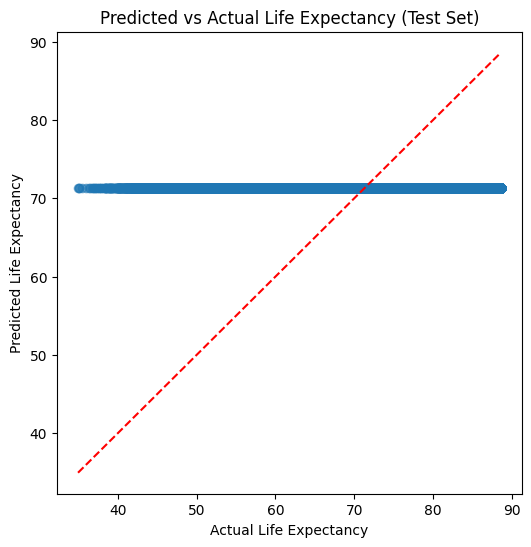

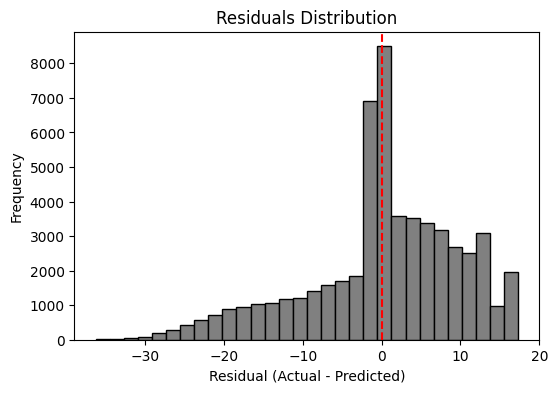

In [10]:
import matplotlib.pyplot as plt

# Scatter plot of predictions vs actual values
plt.figure(figsize=(6,6))
plt.scatter(y_actuals, y_preds, alpha=0.5)
plt.plot([y_actuals.min(), y_actuals.max()], [y_actuals.min(), y_actuals.max()], 'r--')  # diagonal line
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Predicted vs Actual Life Expectancy (Test Set)')
plt.show()

# Histogram of residuals
residuals = y_actuals - y_preds
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, color='gray', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

In [ ]:
# Save the trained model (state dictionary)
torch.save(model.state_dict(), 'saint_model.pt')
print("Model saved as 'saint_model.pt'")

Model saved as 'saint_model.pt'


In [ ]:

def predict_saint(model, input_features):
    """
    Predict using the SAINT model.

    Args:
        model: The SAINT model (already on device).
        input_features: A list of continuous features. (Example: [5,6,3,8,1,2])

    Returns:
        A scalar prediction.
    """
    model.eval()
    # Convert the input_features list into a 2D tensor (batch size 1)
    x_cont = torch.tensor(np.array(input_features).reshape(1, -1), dtype=torch.float32).to(device) # Move x_cont to device

    # Since we dropped categorical features, we only add the required CLS token.
    # Create a categorical tensor with shape (1,1) with value 0.
    x_categ = torch.zeros((1, 1), dtype=torch.int64).to(device) # Move x_categ to device

    # Create corresponding masks:
    # For categorical data, mask out the CLS token (set to 0) as it's not "real" data.
    cat_mask = torch.ones_like(x_categ, dtype=torch.int64).to(device) # Move cat_mask to device
    cat_mask[:, 0] = 0

    # For continuous data, create a mask of ones.
    cont_mask = torch.ones_like(x_cont, dtype=torch.int64).to(device)  # Move cont_mask to device

    with torch.no_grad():
        # Embed the data and create the representations.
        _, x_categ_enc, x_cont_enc = embed_data_mask(x_categ, x_cont, cat_mask, cont_mask, model)
        # Forward pass through the transformer
        reps = model.transformer(x_categ_enc, x_cont_enc)
        # Extract the CLS token representation (first token)
        y_reps = reps[:, 0, :]
        # Pass through the final MLP to get the prediction.
        y_pred = model.mlpfory(y_reps)

    return y_pred.item()


In [ ]:

# Example usage:
result = predict_saint(model, [5, 6, 3, 8, 1, 2])
print("Prediction:", result)

Prediction: 75.02897644042969
